In [1]:
from sklearn.datasets import load_iris
from sklearn import tree
import sys
import os

#有时候python会很笨，仍然找不到graphviz,需要添加下面这行
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'

In [2]:
# 加载sklearn自带数据
iris = load_iris()
clf = tree.DecisionTreeClassifier()
clf = clf.fit(iris.data,iris.target)

In [3]:
# 模型保存到iris.dot文件中
with open("iris.dot",'w') as f:
    f = tree.export_graphviz(clf,out_file=f)

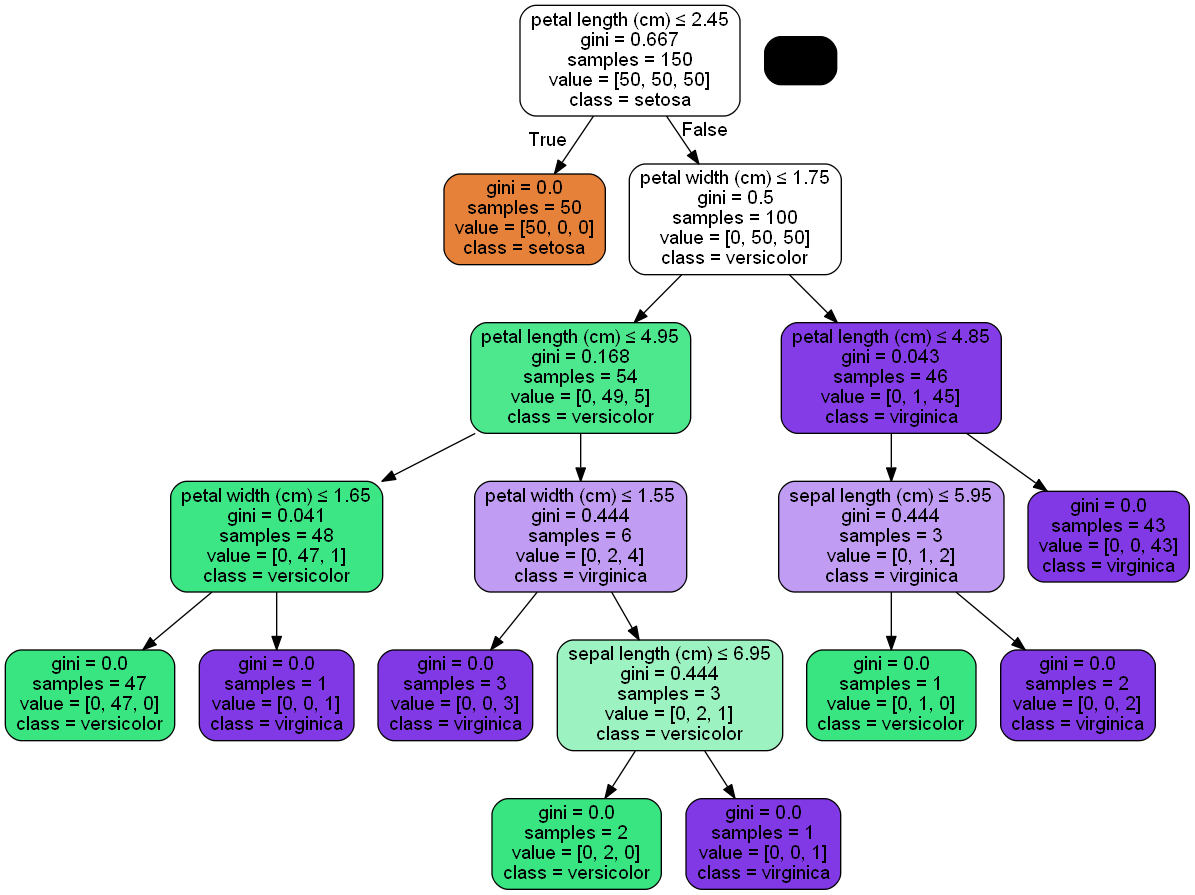

In [12]:
from IPython.display import Image
dot_data = tree.export_graphviz(clf,out_file=None,
                               feature_names=iris.feature_names,
                               class_names=iris.target_names,
                               filled=True,rounded=True,
                               special_characters=True)

import pydotplus

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [19]:
# 实例
from itertools import product
iris = load_iris()
X = iris.data[:,[0,2]]
y = iris.target
X.shape,y.shape

((150, 2), (150,))

In [20]:
clf = tree.DecisionTreeClassifier(max_depth=4) # 限制树最大深度为4
clf.fit(X,y)

DecisionTreeClassifier(max_depth=4)

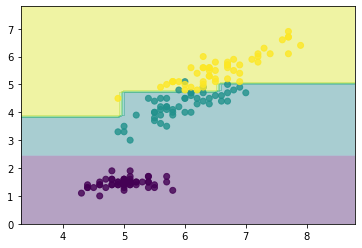

In [21]:
# 画图
import matplotlib.pyplot as plt
import numpy as np

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
Z = clf.predict(np.c_[xx.ravel(),yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx,yy,Z,alpha=0.4)
plt.scatter(X[:,0],X[:,1],c=y,alpha=0.8)
plt.show()

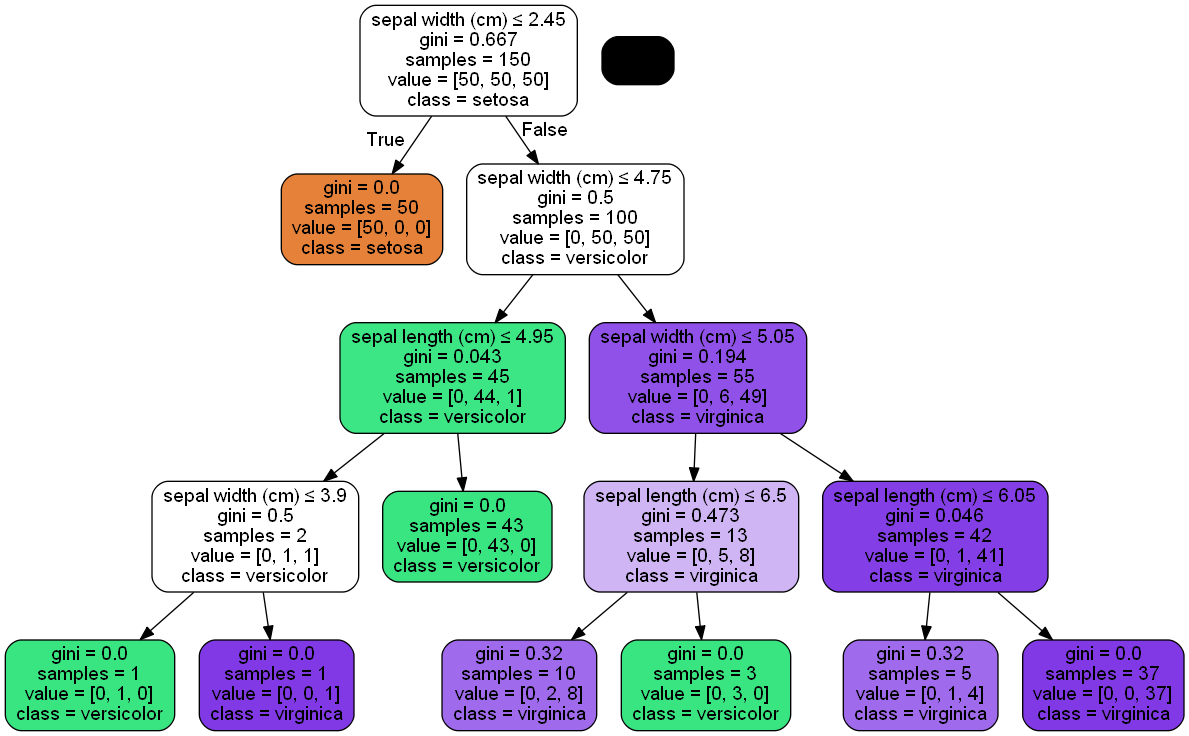

In [27]:
# 可视化决策树
dot_data = tree.export_graphviz(clf,out_file=None,
                               feature_names=iris.feature_names[:2],
                               class_names=iris.target_names,
                               filled=True,rounded=True,
                               special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())
